# Visualization

By this time you know quite a lot of Python and should have a good understanding of the language itself. However Python is a very popular language with a lot of contributors who have created a great number of tools out there that are available to you. We will therefore in this week's class use your knowledge within Python and explore these tools to make sure that you find a good balance between creating original solutions using the tools at your disposal.

We will concentrate this class around data, more precisely how to work with it and visualize it. There are three libraries that we will look at a little closer: *Pandas* for loading and working with data, *Numpy* for numeric computations and *Matplotlib* for visualizing everything. After introducing these libraries we will do a small data science project together working with the *Iris dataset* and try to solve the classification problem.

## numpy

In [1]:
import numpy as np

## matplotlib

[Matplotlib](https://matplotlib.org/) is a graphics library that supports 2D and 3D plots. It is a great tool for visualizing data in a programmatic way and to explore in an interactive way.

We will only cover the basics here and you are recommended to do some further research on your own on the possibilities with matplotlib.

We start by importing the module.

In [2]:
import matplotlib.pyplot as plt

The following line is a small quirk just to make the plots visualize within the notebook instead of creating new windows.

In [3]:
%matplotlib inline

### Matlab API style

matplotlib is designed to be compatible with Matlab plotting API. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. If you are already familiar with Matlab this might be the easiest way to get started. Lets start by a very simple linear example.

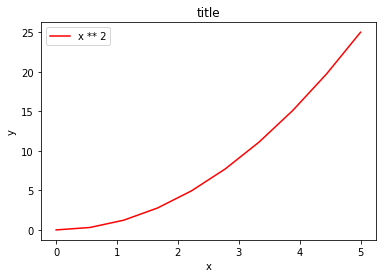

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

plt.figure()           # start a new figure
plt.plot(x, y, 'r')    # plot x, y in color red
plt.xlabel('x')        # set x label
plt.ylabel('y')        # set y label
plt.title('title')     # set title for the plot
plt.legend(["x ** 2"]) # set legend
plt.show()             # invoke the drawing of the plot

As you can see there are no objects, the functions all modify a global state that starts and ends by invoking `figure` and `show`. This way of writing might feel easy and comfortable if you are already familiar with Matlab, but for flexibility it is better to use the object oriented way.

There is also support for subploting:

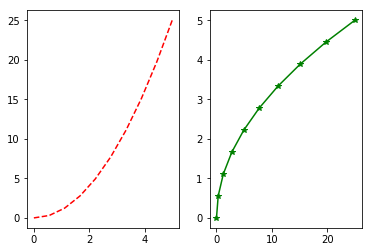

In [5]:
# make subplots with 1 row and 2 columns
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-');
plt.show()

The Matlab API style is easy to get started with, especially for simple plots. However when more advanced plots want to be made it might become a little difficult, for these cases there is the *object oriented API*.

### Object oriented API style

matplotlib does in addition support an object oriented API. To achieve the same as above but using the object oriented way we write:

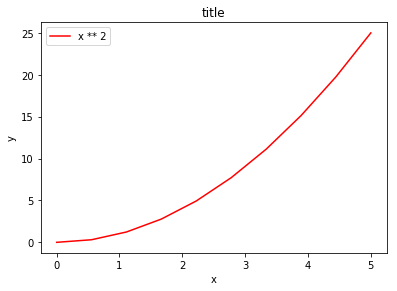

In [6]:
# NOTE we create a new object here that we use for the functions
fig = plt.figure() 

# in a figure we create different axises that we want to plot inside
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(["x ** 2"])

# draws all created figures
plt.show() 

In this form we create a new `Figure` object by calling `plt.figure()`. Then we add an axis to it by calling `Figure.add_axes`, which returns an `Axes` object, which we plot inside. When we call `plt.show()` all created figures are shown.

We can add several axes to the same figure:

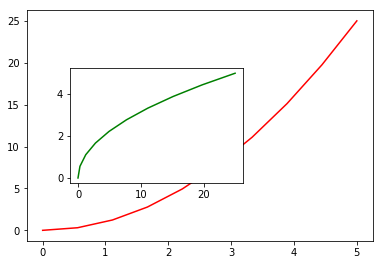

In [7]:
fig = plt.figure()

# create a first axis that we plot x, y to
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y, 'r')

# create a second axis within the same figure where we plot y, x
ax2 = fig.add_axes([0.2, 0.3, 0.4, 0.4])
ax2.plot(y, x, 'g')

plt.show()

Following is an example of making sub plots using the object oriented way.

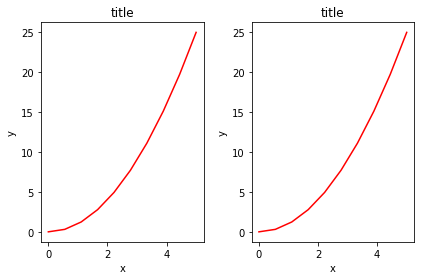

In [8]:
# create a subplot of 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2)

# for each axis plot x, y in red
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig.tight_layout() # this fixes the layout so there are no overlapping plots
plt.show()

Notice how we do not need to explicitely specifiy the dimensions for our axes when using `pyplot.subplots`, this works also in case we only are doing one plot and we do not care where the axis is placed.

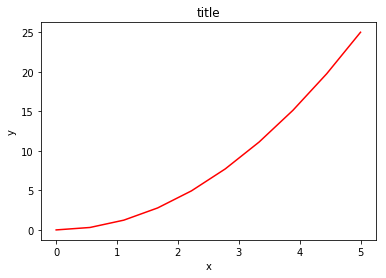

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
plt.show()

### Legends

Legends are added to your plots using the [`Axes.legend`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend) function. It can be quite well customized but what is good to remember is that it takes a first list of labels to use as labels, and you can add a `loc` parameter to tell it where to draw the legend.

| Location String |	Location Code |
|-----------------|---------------|
| 'best' |	0 |
| 'upper right' |	1 
| 'upper left'  |	2
| 'lower left' | 	3
| 'lower right' |	4
| 'right' |	5
| 'center left' 	| 6
| 'center right' 	| 7
| 'lower center' 	| 8
| 'upper center' | 9
| 'center' |	10


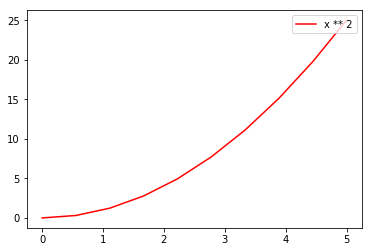

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r')
ax.legend(["x ** 2"], loc=1) # upper right corner
plt.show() 

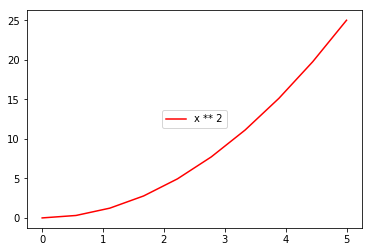

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r')
ax.legend(["x ** 2"], loc=10) # center
plt.show() 

### Line types and line colors

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

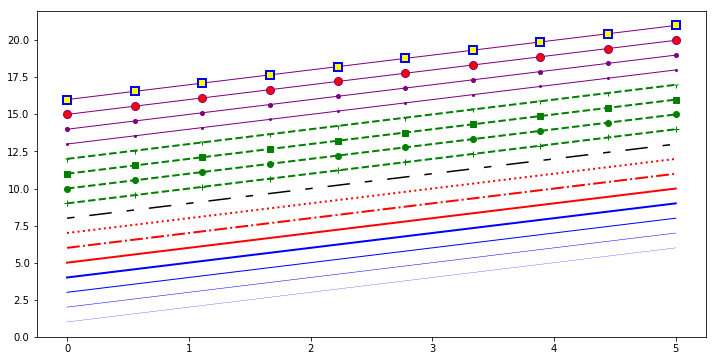

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue")

plt.show()

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `Axes.set_xticks` and `Axes.set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `Axes.set_xticklabels` and `Axes.set_yticklabels` methods to provide a list of custom text labels for each tick location:

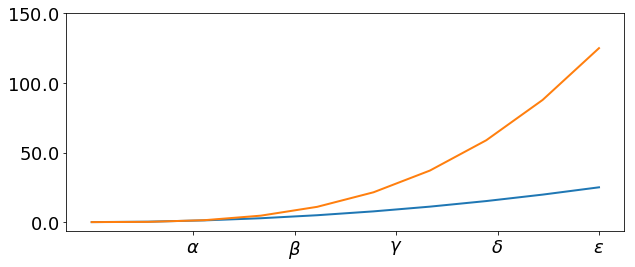

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, lw=2)
ax.plot(x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18) # use LaTeX formatted labels

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["${:.1f}$".format(y) for y in yticks], fontsize=18); 

plt.show()

### Axis grid

With the [`Axes.grid`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html#matplotlib.axes.Axes.grid) method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

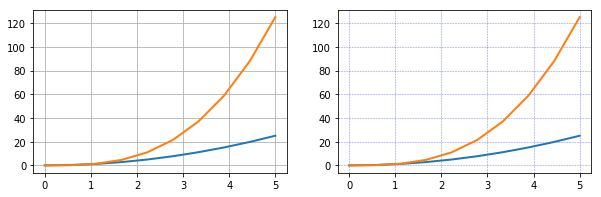

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, lw=2)
axes[0].plot(x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, lw=2)
axes[1].plot(x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

### Other kind of plots

matplotlib supports a wide range of different plotting styles except for the `plot` method which is for 2D line plots. Below are some examples of the more useful ones.

In [15]:
xx = np.linspace(-0.75, 1., 100)
n = np.array([0, 1, 2, 3, 4, 5])

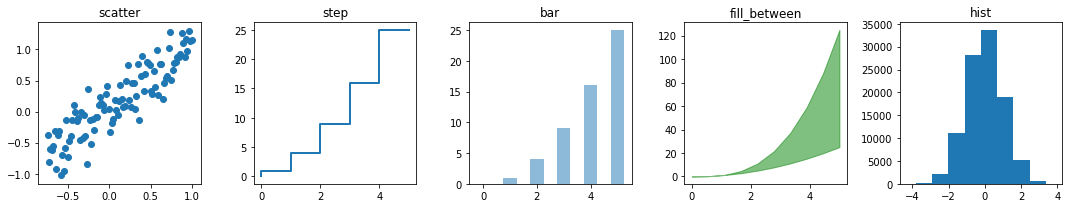

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between")

n = np.random.randn(100000)
axes[4].hist(n)
axes[4].set_title("hist")
axes[4].set_xlim((min(n), max(n)))

fig.tight_layout()

plt.show()

### 3D plots

To use 3D graphics in matplotlib, we first need to create an instance of the Axes3D class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a projection='3d' keyword argument to the add_axes or add_subplot methods.

In [18]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [22]:
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

#### Surface plots

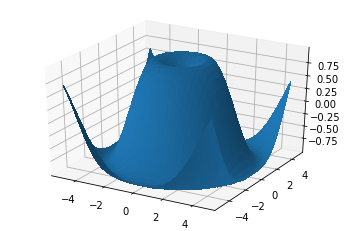

In [27]:
fig = plt.figure()
# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False)

#### Wireframe

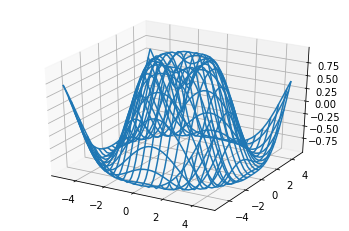

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

#### Scatter

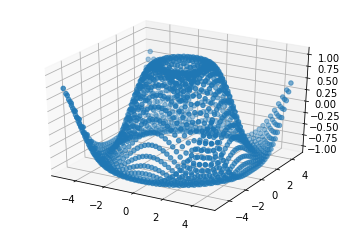

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.scatter(X, Y, Z)

### Saving figures

You can easily also save your figures to disk so you can view them later using the `Figure.savefig` function.

In [17]:
fig.savefig("filename.png")

#### Supported file formats

matplotlib has support for many different file formats including: png, pdf, ps, eps and svg. If you need to include your graph in a LaTex document pdf is a good choice if you compile your document with `pdflatex`.